## Boosting

In [1]:
# 와인 데이터 읽어오기

import pandas as pd

wine_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/wine.csv'

wine = pd.read_csv(wine_url, index_col = 0)
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [2]:
# 와인데이터 맛 컬럼 생성 후 훈련/답 데이터 분리

wine['taste'] = [1. if grade > 5 else 0. for grade in wine['quality']]

X = wine.drop(['taste', 'quality'], axis = 1)
y = wine['taste']

In [3]:
# StandardScalar 적용

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_sc = sc.fit_transform(X)

In [4]:
# 훈련 / 검증 데이터 분리

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size=0.2, random_state=13)

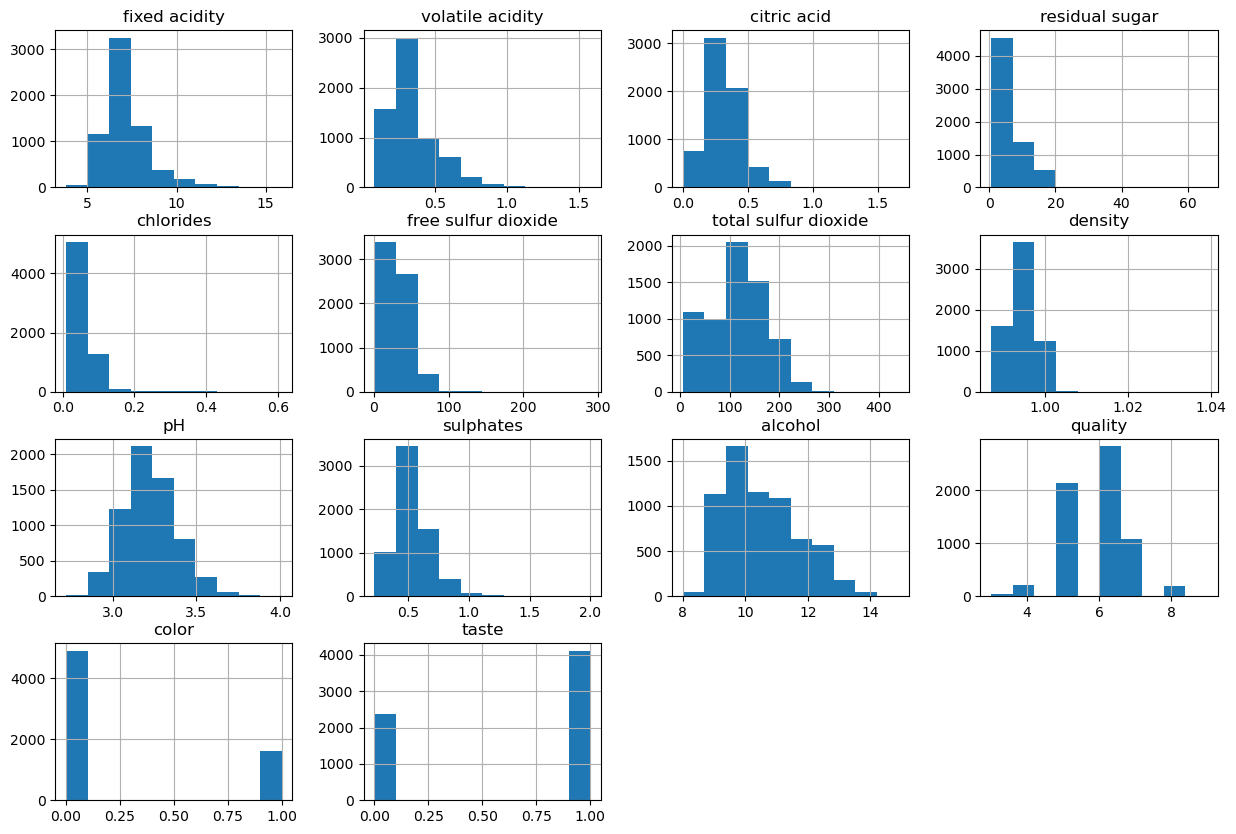

In [5]:
# 모든 컬럼 히스토그램 확인

import matplotlib.pyplot as plt

wine.hist(bins=10, figsize=(15,10))
plt.show()

In [6]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'color', 'taste'],
      dtype='object')

In [7]:
# quality 별 다른 특성 확인

column_names = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

df_pivot_table = wine.pivot_table(column_names, ['quality'], aggfunc='median')

print(df_pivot_table)

         alcohol  chlorides  citric acid   density  fixed acidity  \
quality                                                             
3          10.15     0.0550         0.33  0.995900           7.45   
4          10.00     0.0505         0.26  0.994995           7.00   
5           9.60     0.0530         0.30  0.996100           7.10   
6          10.50     0.0460         0.31  0.994700           6.90   
7          11.40     0.0390         0.32  0.992400           6.90   
8          12.00     0.0370         0.32  0.991890           6.80   
9          12.50     0.0310         0.36  0.990300           7.10   

         free sulfur dioxide     pH  residual sugar  sulphates  \
quality                                                          
3                       17.0  3.245            3.15      0.505   
4                       15.0  3.220            2.20      0.485   
5                       27.0  3.190            3.00      0.500   
6                       29.0  3.210            3

In [8]:
# quality에 대한 나머지 특성들의 상관관계 확인

corr_matrix = wine.corr()
print(corr_matrix['quality'].sort_values(ascending=False))

quality                 1.000000
taste                   0.814484
alcohol                 0.444319
citric acid             0.085532
free sulfur dioxide     0.055463
sulphates               0.038485
pH                      0.019506
residual sugar         -0.036980
total sulfur dioxide   -0.041385
fixed acidity          -0.076743
color                  -0.119323
chlorides              -0.200666
volatile acidity       -0.265699
density                -0.305858
Name: quality, dtype: float64


<Axes: xlabel='taste', ylabel='count'>

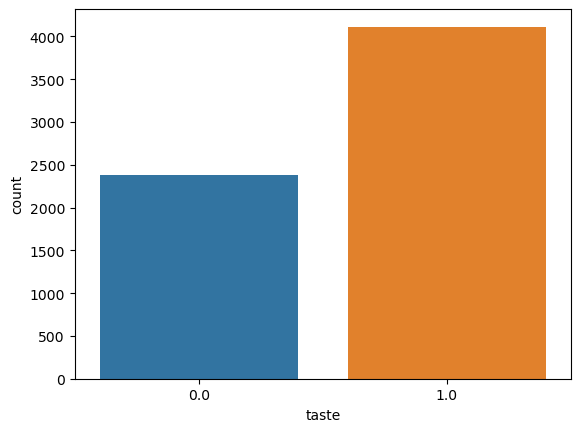

In [9]:
# taste 컬럼의 분포

import seaborn as sns

sns.countplot(data = wine, x= 'taste')

In [10]:
# 다양한 모델 한번에 테스트 위한 준비

from sklearn.ensemble import (AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier)
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

models = []
models.append(('RandomForestClassifier', RandomForestClassifier()))
models.append(('DecisionTreeClassifier', DecisionTreeClassifier()))
models.append(('AdaBoostClassifier', AdaBoostClassifier()))
models.append(('GradientBoostingClassifier', GradientBoostingClassifier()))
models.append(('LogisticRegression', LogisticRegression()))

In [11]:
# 결과 저장 위한 작업

from sklearn.model_selection import KFold, cross_val_score

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=5, random_state=13, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train,
                                 cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)

    print(name, cv_results.mean(), cv_results.std())

RandomForestClassifier 0.8216211964166729 0.020351437766489174
DecisionTreeClassifier 0.7579340342044866 0.011623178136727835
AdaBoostClassifier 0.7533103205745169 0.02644765901536818
GradientBoostingClassifier 0.7663959428444511 0.021596556352125432
LogisticRegression 0.74273191678389 0.015548839626296565


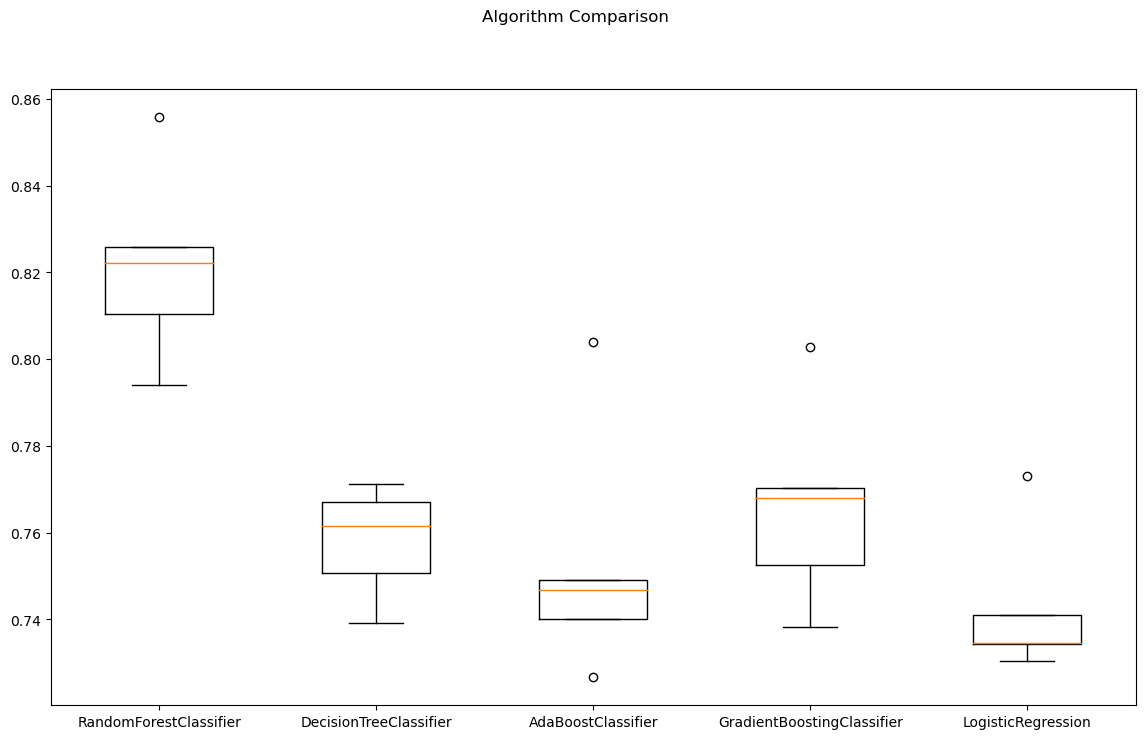

In [12]:
# cross_validation boxplot으로 확인하기

fig = plt.figure(figsize=(14, 8))

fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [13]:
# 테스트 데이터에 대한 평가 결과

from sklearn.metrics import accuracy_score

for name, model in models:
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(name, accuracy_score(y_test, pred))

RandomForestClassifier 0.8353846153846154
DecisionTreeClassifier 0.7830769230769231
AdaBoostClassifier 0.7553846153846154
GradientBoostingClassifier 0.7876923076923077
LogisticRegression 0.7469230769230769


## kNN (k Nearest Neighbors)

In [14]:
# iris 데이터 읽기

from sklearn.datasets import load_iris

iris = load_iris()

In [15]:
# 데이터 분할 (훈련 / 검증)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size = 0.2,
                                                    random_state=13, stratify=iris.target)

In [16]:
# kNN 학습

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [17]:
# kNN prediction

from sklearn.metrics import accuracy_score

pred = knn.predict(X_test)
print(accuracy_score(y_test, pred))

0.9666666666666667


In [18]:
# confusion matrix & classification report

from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



## GBM, XGBoost, LGBM

In [19]:
# HAR 데이터 읽기

import pandas as pd

url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/HAR_dataset/features.txt'

feature_name_df = pd.read_csv(url, sep='\s+', header=None, names= ['column_index', 'column_name'])

feature_name = feature_name_df.iloc[:, 1].values.tolist()

X_train_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/' + \
              'master/dataset/HAR_dataset/train/X_train.txt'
X_test_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/' + \
             'master/dataset/HAR_dataset/test/X_test.txt'

X_train = pd.read_csv(X_train_url, sep='\s+', header=None)
X_test = pd.read_csv(X_test_url, sep='\s+', header=None)
X_train.columns = feature_name
X_test.columns = feature_name

In [20]:
y_train_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/' + \
              'master/dataset/HAR_dataset/train/y_train.txt'
y_test_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/' + \
             'master/dataset/HAR_dataset/test/y_test.txt'

y_train = pd.read_csv(y_train_url, sep='\s+', header=None, names=['action'])
y_test = pd.read_csv(y_test_url, sep='\s+', header=None, names=['action'])

### GBM 사용해보기

In [21]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import time
import warnings

warnings.filterwarnings('ignore')

In [22]:
start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=13)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)

print('ACC: ', accuracy_score(y_test, gb_pred))
print('Fit time: ', time.time() - start_time)

ACC:  0.9385816084153377
Fit time:  822.5461094379425


In [ ]:
# GridSearchCV 적용 >> 40분 넘게 걸림

from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators' : [100, 500],
    'learning_rate' : [0.05, 0.1]
}

start_time = time.time()

grid = GridSearchCV(gb_clf, param_grid=params, cv=2, verbose=1, n_jobs = 4)
grid.fit(X_train, y_train)

print('Fit time: ', time.time() - start_time)

In [27]:
# ! pip install xgboost

     ---------------------------------------- 0.0/70.9 MB ? eta -:--:--
     - -------------------------------------- 1.9/70.9 MB 40.3 MB/s eta 0:00:02
     -- ------------------------------------- 4.5/70.9 MB 47.6 MB/s eta 0:00:02
     ---- ----------------------------------- 7.2/70.9 MB 50.7 MB/s eta 0:00:02
     ----- ---------------------------------- 9.5/70.9 MB 50.9 MB/s eta 0:00:02
     ------ -------------------------------- 11.6/70.9 MB 50.4 MB/s eta 0:00:02
     -------- ------------------------------ 14.7/70.9 MB 54.7 MB/s eta 0:00:02
     --------- ----------------------------- 17.2/70.9 MB 54.7 MB/s eta 0:00:01
     ---------- ---------------------------- 19.7/70.9 MB 54.4 MB/s eta 0:00:01
     ------------ -------------------------- 22.2/70.9 MB 54.4 MB/s eta 0:00:01
     ------------- ------------------------- 24.8/70.9 MB 54.4 MB/s eta 0:00:01
     -------------- ------------------------ 27.1/70.9 MB 54.4 MB/s eta 0:00:01
     ---------------- ---------------------- 29.

### XGBoost

* parameters
  - nthread: CPU 실행 스레드 개수 조정 (default = 전체 스레드 사용)
  - eta: GBM 학습률
  - num_boost_rounds: n_estimators와 같은 파라미터
  - max_depth

In [24]:
# XGBoost는 0부터 순차적으로 데이터 결과 값이 있어야 하므로 1~6까지의 결과가 있는 y_train 변경
# 참고: https://stackoverflow.com/questions/71996617/invalid-classes-inferred-from-unique-values-of-y-expected-0-1-2-3-4-5-got

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_le = le.fit_transform(y_train)
y_test_le = le.fit_transform(y_test)

In [25]:
# XGBoost 사용해보기

from xgboost import XGBClassifier

start_time = time.time()

xgb = XGBClassifier(n_estimators=400, learning_rate = 0.1, max_depth = 3)
xgb.fit(X_train.values, y_train_le)
print('Fit time : ', time.time()-start_time)

Fit time :  52.64647603034973


In [28]:
accuracy_score(y_test_le, xgb.predict(X_test.values))

0.9494401085850017

In [30]:
# 조기 종료 조건을 달아주기 (early_stopping)
# early stopping rounds => 해당 round 만큼 학습하는 동안 성능이 비슷하면 더 이상 개선할 필요 없다고 판단, 조기 종료

evals = [(X_test.values, y_test_le)] # XGBoost는 내부적으로 검증이 가능하므로 검증할 데이터 선언

start_time = time.time()
xgb = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgb.fit(X_train.values, y_train_le, early_stopping_rounds = 10, eval_set = evals)
print('Fit time : ', time.time()-start_time)

[0]	validation_0-mlogloss:1.58932
[1]	validation_0-mlogloss:1.43267
[2]	validation_0-mlogloss:1.30322
[3]	validation_0-mlogloss:1.19383
[4]	validation_0-mlogloss:1.10067
[5]	validation_0-mlogloss:1.01957
[6]	validation_0-mlogloss:0.94662
[7]	validation_0-mlogloss:0.88249
[8]	validation_0-mlogloss:0.82727
[9]	validation_0-mlogloss:0.77601
[10]	validation_0-mlogloss:0.72925
[11]	validation_0-mlogloss:0.68936
[12]	validation_0-mlogloss:0.65128
[13]	validation_0-mlogloss:0.61844
[14]	validation_0-mlogloss:0.58748
[15]	validation_0-mlogloss:0.55894
[16]	validation_0-mlogloss:0.53410
[17]	validation_0-mlogloss:0.50956
[18]	validation_0-mlogloss:0.48868
[19]	validation_0-mlogloss:0.46809
[20]	validation_0-mlogloss:0.45075
[21]	validation_0-mlogloss:0.43385
[22]	validation_0-mlogloss:0.41768
[23]	validation_0-mlogloss:0.40316
[24]	validation_0-mlogloss:0.38937
[25]	validation_0-mlogloss:0.37645
[26]	validation_0-mlogloss:0.36394
[27]	validation_0-mlogloss:0.35407
[28]	validation_0-mlogloss:0.3

In [32]:
accuracy_score(y_test_le, xgb.predict(X_test.values))

0.9419748897183576

## LGBM

In [33]:
# !pip install lightgbm

In [33]:
from lightgbm import LGBMClassifier

start_time = time.time()

evals = [(X_test.values, y_test)]

lgbm = LGBMClassifier(n_estimators=400, early_stopping_round=20)
lgbm.fit(X_train.values, y_train, eval_set=evals)
print('Fit time: ', time.time() - start_time)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014694 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 140170
[LightGBM] [Info] Number of data points in the train set: 7352, number of used features: 561
[LightGBM] [Info] Start training from score -1.791216
[LightGBM] [Info] Start training from score -1.924514
[LightGBM] [Info] Start training from score -2.009071
[LightGBM] [Info] Start training from score -1.743436
[LightGBM] [Info] Start training from score -1.677246
[LightGBM] [Info] Start training from score -1.653513
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[38]	valid_0's multi_logloss: 0.233106
Fit time:  5.814281940460205


In [34]:
accuracy_score(y_test, lgbm.predict(X_test.values))

0.9260264675941635